<a href="https://colab.research.google.com/github/vimalT123/prodigy_ml_02/blob/main/prodigy_ml_002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


import os
os.environ['OMP_NUM_THREADS'] = '1'
from sklearn.cluster import KMeans


df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

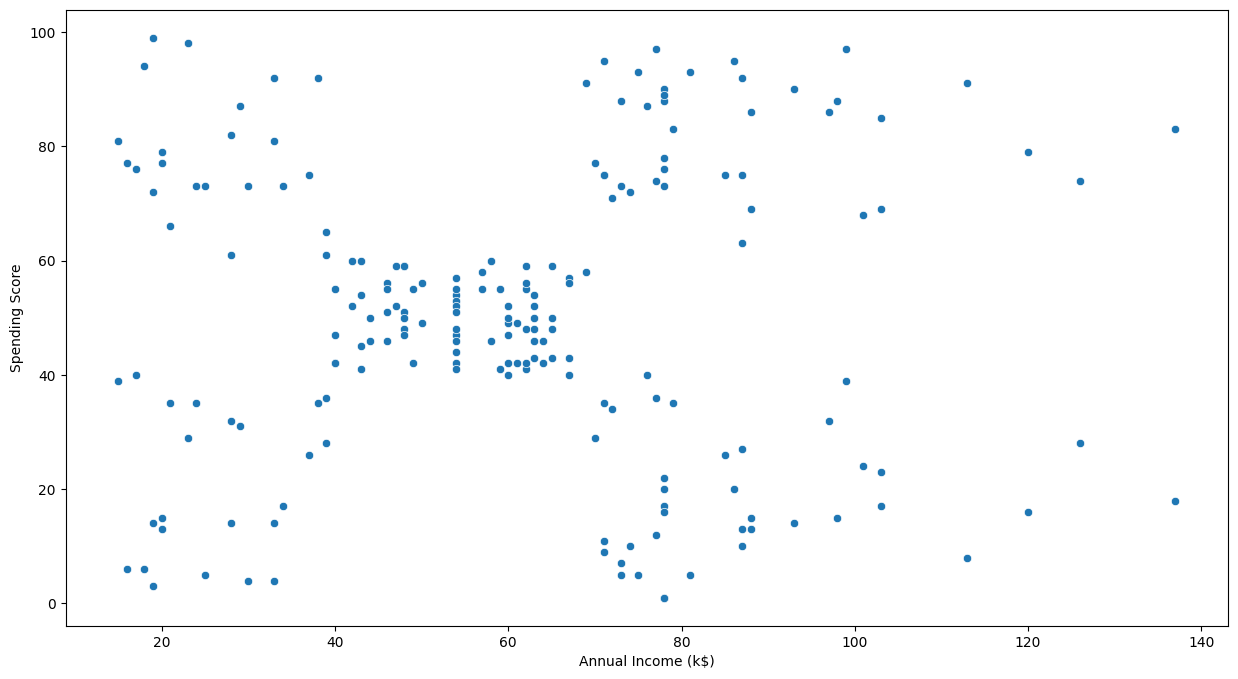

In [4]:

X = df.drop(columns=['CustomerID','Gender','Age'], axis=1).values
plt.figure(figsize=(15, 8))
sns.scatterplot(x=X[:, 0], y=X[:, 1])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

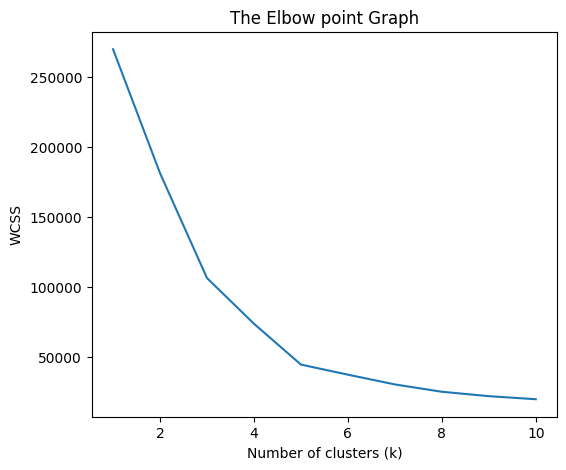

In [5]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)
WCSS = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    WCSS.append(kmeans.inertia_)
plt.figure(figsize=(6,5))
plt.plot(range(1,11),WCSS)
plt.title("The Elbow point Graph")
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.show()


kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0, n_init=10)


Y =kmeans.fit_predict (X)
kmeans.cluster_centers_

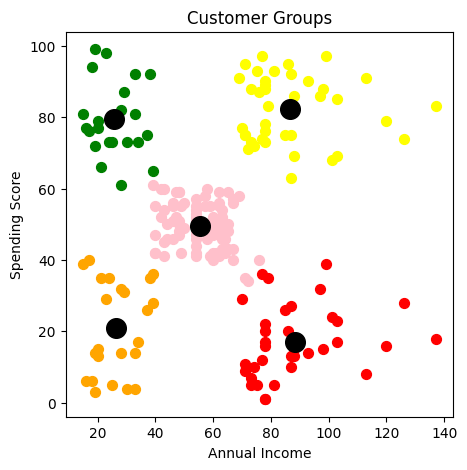

In [7]:

plt. figure(figsize=(5,5))
plt.scatter (X[Y==0,0], X[Y==0,1], s=50, c='red', label='Cluster 1')
plt.scatter (X[Y==1,0], X[Y==1,1], s=50, c='pink', label='Cluster 2')
plt.scatter (X[Y==2,0], X[Y==2,1], s=50, c='yellow', label='Cluster 3')
plt.scatter (X[Y==3,0], X[Y==3,1], s=50, c='green', label='Cluster 4')
plt.scatter (X[Y==4,0], X[Y==4,1], s=50, c='orange', label='Cluster 5')
plt.scatter (kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=200, c='black', label = 'Cluster 6')
plt.title('Customer Groups')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()